In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./preprocessed_data/INSEE_deces_1990_2019_byweek.csv.gz", compression='gzip')

In [4]:
df.head()

year  weeknumber      age_bin  sexe              departement  \
0  1990           1  00 à 19 ans     1                      Ain   
1  1990           1  00 à 19 ans     1                    Aisne   
2  1990           1  00 à 19 ans     1                   Allier   
3  1990           1  00 à 19 ans     1          Alpes-Maritimes   
4  1990           1  00 à 19 ans     1  Alpes-de-Haute-Provence   

                       region  nb_deces  
0        Auvergne-Rhône-Alpes       1.0  
1             Hauts-de-France       0.0  
2        Auvergne-Rhône-Alpes       0.0  
3  Provence-Alpes-Côte d'Azur       1.0  
4  Provence-Alpes-Côte d'Azur       3.0

# First exploration of the data

Groupby to get data at the national level, mix also age_bin and sexe

In [5]:
# Weeknumber 1, 52, 53 are noisy (with sudden drops in numbers)
# I guess because some years border weeknumbers are cut in half, etc). 
# I do not see any simple solution to this so I'll remove the weird weeknumbers; 1, 52 and 53
df = df[(df.weeknumber>1) & (df.weeknumber<52)] 

In [6]:
df_nat = df.groupby(["year","weeknumber"], as_index=False)["nb_deces"].sum()

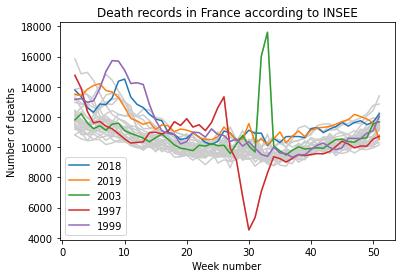

In [7]:
ax = plt.subplot(1,1,1)
for y in np.arange(1990,2018):
    ax.plot(df_nat.weeknumber[df_nat.year==y], df_nat.nb_deces[df_nat.year==y].astype('float'), '-', color="0.8");
p2, = ax.plot(df_nat.weeknumber[df_nat.year==2018], df_nat.nb_deces[df_nat.year==2018].astype('float'), '-', label="2018");
p3, = ax.plot(df_nat.weeknumber[df_nat.year==2019], df_nat.nb_deces[df_nat.year==2019].astype('float'), '-', label="2019");
p4, = ax.plot(df_nat.weeknumber[df_nat.year==2003], df_nat.nb_deces[df_nat.year==2003].astype('float'), '-', label="2003");
p4, = ax.plot(df_nat.weeknumber[df_nat.year==1997], df_nat.nb_deces[df_nat.year==1997].astype('float'), '-', label="1997");
p4, = ax.plot(df_nat.weeknumber[df_nat.year==1999], df_nat.nb_deces[df_nat.year==1999].astype('float'), '-', label="1999");
ax.legend()
plt.title("Death records in France according to INSEE")
plt.xlabel("Week number")
plt.ylabel("Number of deaths")
plt.show()

Observations:
- 2003 heat wave in France was bad... (so much it is probably better to ignore it if one wants to build a predictive model)
- It seems that the worst flu in the data was in 1999, quite a bad one
- 1997 appears as mostly bogus and should be removed from any further analysis (if someone knows what happened please tell me)

In [8]:
df = df[ (df['year']!=2003) & (df['year']!=1997)  ]
df_nat = df.groupby(["year","weeknumber"], as_index=False)["nb_deces"].sum()

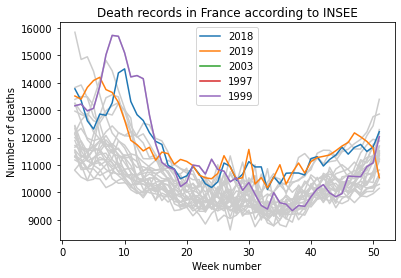

In [9]:
ax = plt.subplot(1,1,1)
for y in np.arange(1990,2018):
    ax.plot(df_nat.weeknumber[df_nat.year==y], df_nat.nb_deces[df_nat.year==y].astype('float'), '-', color="0.8");
p2, = ax.plot(df_nat.weeknumber[df_nat.year==2018], df_nat.nb_deces[df_nat.year==2018].astype('float'), '-', label="2018");
p3, = ax.plot(df_nat.weeknumber[df_nat.year==2019], df_nat.nb_deces[df_nat.year==2019].astype('float'), '-', label="2019");
p4, = ax.plot(df_nat.weeknumber[df_nat.year==2003], df_nat.nb_deces[df_nat.year==2003].astype('float'), '-', label="2003");
p4, = ax.plot(df_nat.weeknumber[df_nat.year==1997], df_nat.nb_deces[df_nat.year==1997].astype('float'), '-', label="1997");
p4, = ax.plot(df_nat.weeknumber[df_nat.year==1999], df_nat.nb_deces[df_nat.year==1999].astype('float'), '-', label="1999");
ax.legend()
plt.title("Death records in France according to INSEE")
plt.xlabel("Week number")
plt.ylabel("Number of deaths")
plt.show()